### Overview of Dataset

In [1]:
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# read the file and create a pandas dataframe
data = pd.read_csv('diabetic_data.csv')

### The Response Variable: 'readmitted'

In [28]:
# recode the response variable so that it becomes a binary classification task.
# '0' means no readmission
# '1' means readmission no matter how many days after being discharged
data['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in data['readmitted']])
data_origin = data

# Feature Engineering and EDA
Explore data analysis on each feature and decide how to deal with them.

In [29]:
# remove irrelevant features
data.drop(['encounter_id', 'patient_nbr', 'payer_code', 'weight', 'medical_specialty'], axis=1, inplace=True)

In [30]:
# remove rows that have NA in 'race', 'diag_1', 'diag_2', or 'diag_3'
# remove rows that have invalid values in 'gender'
data = data[data['race'] != '?']
data = data[data['diag_1'] != '?']
data = data[data['diag_2'] != '?']
data = data[data['diag_3'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']

In [31]:
# Recategorize 'age' so that the population is more evenly distributed
data['age'] = pd.Series(['0-20' if val in ['[0-10)', '[10-20)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['20-40' if val in ['[20-30)', '[30-40)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['40-60' if val in ['[40-50)', '[50-60)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['60-80' if val in ['[60-70)', '[70-80)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['80-100' if val in ['[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)

In [33]:
# original 'discharge_disposition_id' contains 28 levels
# reduce 'discharge_disposition_id' levels into 2 categories
# discharge_disposition_id = 1 corresponds to 'Discharge Home'
data['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in data['discharge_disposition_id']], index=data.index)

In [34]:
# original 'admission_source_id' contains 25 levels
# reduce 'admission_source_id' into 3 categories
data['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val == 1 else 'Other source' 
                                              for val in data['admission_source_id']], index=data.index)

In [35]:
# original 'admission_type_id' contains 8 levels
# reduce 'admission_type_id' into 2 categories
data['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in data['admission_type_id']], index=data.index)

In [36]:
# keep only 'insulin' and remove the other 22 diabetes medications
data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

In [38]:
# denote 'diag_1' as '1' if it relates to diabetes and '0' if it's not
# remove 'diag_2' and 'diag_3'
data['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in data['diag_1']], index=data.index)
data.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

In [40]:
# one-hot-encoding on categorical features
# convert nominal values to dummy values
df_age = pd.get_dummies(data['age'],drop_first=True,prefix='age')

df_race = pd.get_dummies(data['race'],drop_first=True,prefix='race')
df_gender = pd.get_dummies(data['gender'],drop_first=True,prefix='gender')
df_max_glu_serum = pd.get_dummies(data['max_glu_serum'],drop_first=True,prefix='max_glu_serum')
df_A1Cresult = pd.get_dummies(data['A1Cresult'],drop_first=True,prefix='A1Cresult')
df_insulin = pd.get_dummies(data['insulin'],drop_first=True,prefix='insulin')
df_change = pd.get_dummies(data['change'],drop_first=True,prefix='change')
df_diabetesMed = pd.get_dummies(data['diabetesMed'],drop_first=True,prefix='diabetesMed')
df_discharge_disposition_id = pd.get_dummies(data['discharge_disposition_id'],drop_first=True,prefix='discharge_disposition_id')
df_admission_source_id = pd.get_dummies(data['admission_source_id'],drop_first=True,prefix='admission_source_id')
df_admission_type_id = pd.get_dummies(data['admission_type_id'],drop_first=True,prefix='admission_type_id')

data = pd.concat([data, df_age, df_race, df_gender, df_max_glu_serum, df_A1Cresult, 
                  df_insulin, df_change, df_diabetesMed, df_discharge_disposition_id, 
                  df_admission_source_id, df_admission_type_id], axis=1)
data.drop(['age', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)


In [44]:
data.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'number_diagnoses', 'readmitted',
       'age_20-40', 'age_40-60', 'age_60-80', 'age_80-100', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'insulin_No',
       'insulin_Steady', 'insulin_Up', 'change_No', 'diabetesMed_Yes',
       'discharge_disposition_id_Other discharge',
       'admission_source_id_Other source', 'admission_source_id_Referral',
       'admission_type_id_Other type'],
      dtype='object')

In [45]:
# feature scaling, features are standardized to have zero mean and unit variance
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

# Feature Importance

In [46]:
# create X (features) and y (response)
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [47]:
# split X and y into cross-validation (75%) and testing (25%) data sets
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 15 features are: 
num_lab_procedures
num_medications
time_in_hospital
num_procedures
number_diagnoses
number_inpatient
gender_Male
number_outpatient
discharge_disposition_id_Other discharge
race_Caucasian
admission_type_id_Other type
number_emergency
change_No
admission_source_id_Referral
insulin_Steady


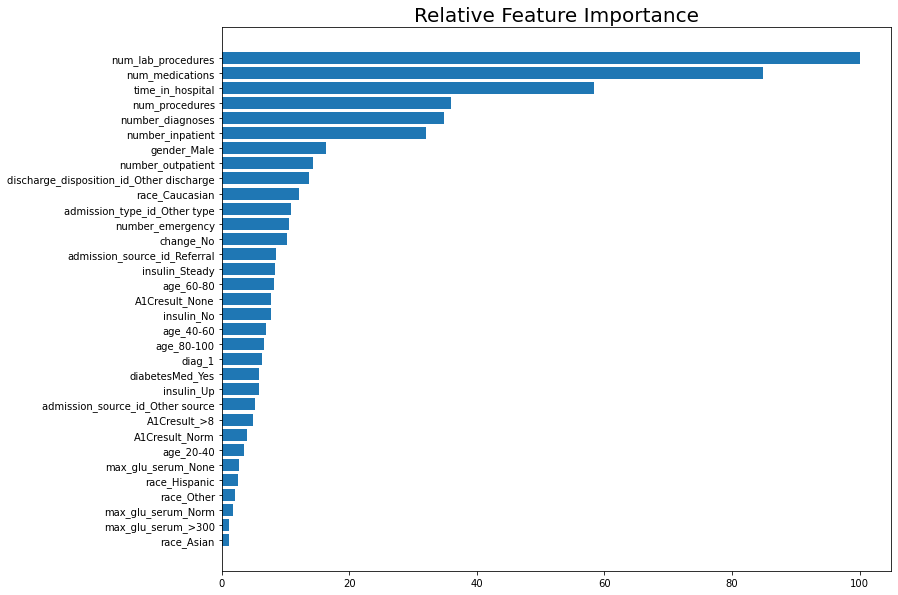

In [49]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 15 features are: ')
for feature in feature_names_sort[::-1][:15]:
    print(feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [50]:
a=[]
for col in X_cv.columns:
    if col not in feature_names_sort[::-1][:15]:
        a.append(col)
a

['diag_1',
 'age_20-40',
 'age_40-60',
 'age_60-80',
 'age_80-100',
 'race_Asian',
 'race_Hispanic',
 'race_Other',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'insulin_No',
 'insulin_Up',
 'diabetesMed_Yes',
 'admission_source_id_Other source']

In [51]:
X_cv.drop(['diag_1',
           'change_No',
    'race_Asian',
 'race_Hispanic',
 'race_Other',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'insulin_No',
 'insulin_Up',
 'diabetesMed_Yes',
 'admission_source_id_Other source'],inplace=True, axis=1)

C:\Users\ASHOK\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Model Selection
Compare the performance of three machine learning algorithms: Random Forest, Naive Bayes, and Logistic Regression.

Select the best model using 10-fold cross validation. The metric that will be using is the accuracy of prediction.

In [52]:
from sklearn.model_selection import cross_val_score

# Parameter Tuning Using GridSearchCV
Use GridSearchCV to tune parameter C in logistic regression. Smaller C values specify stronger regularization.

In [53]:
# define the parameter values that should be searched
C_range = np.arange(0.1, 3.1, 0.2)
param_grid = dict(C = C_range)

# Evaluation Metrics

### Classification accuracy
NULL accuracy: accuracy that could be achieved by always predicting the most frequent class -- 'No Readmission'.

In [55]:
X_cv.columns

Index(['age_20-40', 'age_40-60', 'age_60-80', 'age_80-100', 'race_Caucasian',
       'gender_Male', 'insulin_Steady',
       'discharge_disposition_id_Other discharge',
       'admission_source_id_Referral', 'admission_type_id_Other type',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'number_inpatient',
       'number_emergency', 'number_outpatient'],
      dtype='object')

In [56]:
# train a logistic regression model on the cross-validation set with the optimal C parameter
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_cv, y_cv)

LogisticRegression()

### Confusion matrix
Table that describes the performance of a classification model.

*True Positives (TP)*: we correctly predicted that they do have diabetes

*True Negatives (TN)*: we correctly predicted that they don't have diabetes

*False Positives (FP)*: we incorrectly predicted that they do have diabetes (a "Type I error")

*False Negatives (FN)*: we incorrectly predicted that they don't have diabetes (a "Type II error")

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

**Sensitivity (Recall)**: How "sensitive" is the classifier to detecting positive instances? TP/(TP+FN)

print(metrics.recall_score(y_test, y_pred_class))

**Specificity**: TN/(TN+FP)

print(TN / float(TN + FP))

**False Positive Rate (1 - specificity)**: FP/(TN+FP)

print(FP / float(TN + FP))

**Precision**: TP/(TP+FP)

print(metrics.precision_score(y_test, y_pred_class))

**F1 score**: F1 = 2 x precision x recall / (precision + recall)

print(metrics.f1_score(y_test, y_pred_class))

### Receiver operating characteristic (ROC) curve and area under the curve (AUC)
ROC is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. AUC is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance.

# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes readmission')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# AUC score
print(metrics.roc_auc_score(y_test, y_pred_prob))

In [59]:
joblib.dump(logreg,open('LR_model_v2.sav','wb'))


In [80]:
X.head()
INP=[0,1,0,0,1,1,1,1,-0.8,0.8,2.1,0.234,0.9,0.2,-0.2,1.2]
X.columns

Index(['[50-60)', '[60-70)', '[70-80)', '[80-100)', 'Caucasian', 'Male',
       'Other discharge', 'Other type', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'number_inpatient', 'number_emergency',
       'number_outpatient'],
      dtype='object')

In [79]:
logreg.predict_proba([[0,1,0,0,1,1,1,1,-0.8,0.8,2.1,0.234,0.9,0.2,-0.2,1.2]])

array([[0.50954751, 0.49045249]])

### Adjusting the classification threshold

Decrease the threshold to increase the sensitivity of the classifier, which is more favorable to the prediction of diabetes patient readmission.

# Conclusions
- Six major features are found to have high impact on diabetes patient readmission: number of lab procedures, number of medications administrated during the encounter, time spent in hospital, number of procedures other than lab tests,  number of diagnoses, and number of inpatient visits.

- The logistic regression classifier modeling achieves 0.62 accuracy and 0.66 AUC score. The sensitivity of the modeling can be increased by adjusting the classification threshold.

- To correctly predict the readmission and avoid extra cost, hospitals should carefully examine the clinical data of patients and pay special attention to the above major features.

- Some other features might be worth collecting, for example, date of admission and family history.

- This analytic method can be applied to different diseases other than diabetes.

# References
1. Strack, Beata, et al. "Impact of HbA1c measurement on hospital readmission rates: analysis of 70,000 clinical database patient records." BioMed research international 2014 (2014).
2. Bhuvan, Malladihalli S., et al. "Identifying Diabetic Patients with High Risk of Readmission." arXiv preprint arXiv:1602.04257 (2016).
3. Sushmita, Shanu, et al. "Predicting 30-Day Risk and Cost of" All-Cause" Hospital Readmissions." Workshops at the Thirtieth AAAI Conference on Artificial Intelligence. 2016.